# Linear Regression (Doğrusal Regresyon)

Bir araba şirketinde, araba fiyatları ve araçların satış miktarları gibi iki parametremiz olsun. Genellikle, araç fiyatı arttıkça satış miktarının azaldığını gözlemliyoruz.

Amacımız, bu veri setine en uygun regresyon çizgisini bulmaktır. 

Örneğin, bu yıl araba fiyatının 5 birim olduğunu varsayalım. Bu durumda kaç araba satılacağını tahmin etmek için bu regresyon çizgisi kullanılır.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable

In [2]:
# Araç Fiyatları

In [3]:
car_prices_array = [3,4,5,6,7,8,9] # list
type(car_prices_array)

list

In [4]:
car_price_np = np.array(car_prices_array, dtype=np.float32) # float numpy array
type(car_price_np) # araç fiyatları

numpy.ndarray

In [5]:
car_price_np.shape  # (7,)

(7,)

In [6]:
car_price_np = car_price_np.reshape(-1,1)
# -1: satırları değiştirme neyse o kalsın, sütun sayısını 1 yap
car_price_np

array([[3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]], dtype=float32)

In [7]:
car_price_np.shape  # tensor'e dönüştürmek için (7,1) olmalı 

(7, 1)

In [8]:
# Variable(numpy -> tensor)
car_price_tensor = Variable(torch.from_numpy(car_price_np))
car_price_tensor # Variable

tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [9]:
# Araba Satışları

In [10]:
number_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
# list

In [11]:
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype=np.float32)
# float numpy array

In [12]:
number_of_car_sell_np

array([7.5, 7. , 6.5, 6. , 5.5, 5. , 4.5], dtype=float32)

In [13]:
number_of_car_sell_np.shape

(7,)

In [14]:
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_np.shape

(7, 1)

In [15]:
# Variable(numpy -> tensor)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))
number_of_car_sell_tensor

tensor([[7.5000],
        [7.0000],
        [6.5000],
        [6.0000],
        [5.5000],
        [5.0000],
        [4.5000]])

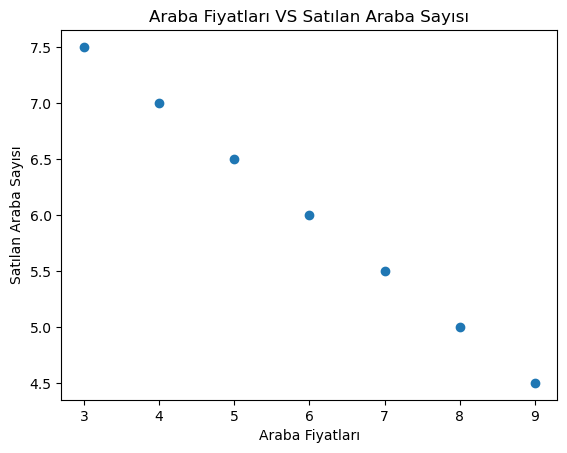

In [16]:
# görselleştirelim
plt.figure()
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel("Araba Fiyatları")
plt.ylabel("Satılan Araba Sayısı")
plt.title("Araba Fiyatları VS Satılan Araba Sayısı")
plt.show()

Fiyatlar ile araç satışları arasındaki ilişki incelenmiş ve araç fiyatlarının arttıkça satışların azaldığı gözlenmiştir.

## Lineer Regresyon Modeli Eğitimi (Eğitim)

1. İlk adımda, bir lineer regresyon sınıfı oluşturulur.
2. Oluşturulan bu sınıf kullanılarak bir model tanımlanır.
3. Lineer regresyonda parametreleri güncelleyebilmek için hata (error) değerlerine ihtiyaç vardır. Bu hatalar, ortalama kare hatası (mean squared error) yöntemi kullanılarak hesaplanır.
4. Hesaplanan hatalar kullanılarak, parametreler optimize edilir ve eğitim (training) işlemi gerçekleştirilir. Bu aşamada optimizasyon yöntemi olarak Stokastik Gradyan İniş (Stochastic Gradient Descent - SGD) kullanılır.
5. Geriye Yayılım (Backpropagation) ile eğitim işleminin ilk aşaması tamamlanır.
6. En uygun regresyon çizgisi ve parametreler bulunur.
7. Tahmin (prediction) işlemi gerçekleştirilir.

1. Regresyon Sınıfı
    * y = W * x + b (x: input, y: output, W: weight, b: bias)
    * x ve y değerleri skaler değerlerdir yani boyutu 1'dir.
    * bias çizginin y ekseni ile kesiştiği yer
    * weight çizginin eğimi
2. Regresyon sınıfını kullanarak bir tane model yani nesne oluşturacağız
    * model = LR()
3. MSE
4. SGD ile optimizasyon işlemi gerçekleştirilir
    * SGD 2 tane parametre alır. learning rate ve model parametreleri
    * lineer regresyon modelinin parametreleri w ile b sgd algoritmamızın içerisinde güncellenir.
5. backpropagation
    * weight ile bias güncellenecek
6. prediction

1. iterasyon:
* w ve b'ye ilk değerler atanır: w=0, b=6 olsun
* denklem: y = 0 * x + 6 -> y = 6 olur. lineer regresyon çizgisi oluşturuldu
* result = model(car price) : çizgiye göre tahmin yapılır.
* result = y = 0 * (car price(x)) + 6 = 6 : tahmini değer 6'dır.
* loss = MSE(6, y_real) : gerçek noktalarla çizgi arasındaki hata bulunur
* loss.backward() : loss değerinin weight'e göre türevi bulunur ve gradient'ler bulunur
* w =: w - (learning rate)*(gradient) w ile bias güncellenir.
* optimizer içerisinde ilgili algoritmanın parametrelerini (weight, bias...) tutar.
* optimizer.step() : güncelleme işlemi gerçekleştirilir.

* w ile b iterasyon sayısı kadar güncellenir.
* bütün iterasyonlar tamamlandığında optimum çizgi elde edilir.

#### Pytorch ile Lineer Regresyon

In [17]:
# kütüphaneler
import torch
from torch.autograd import Variable
import torch.nn as nn

# uyarıları kapat
import warnings
warnings.filterwarnings("ignore")

In [18]:
# sınıfı oluştur
class LinearRegression(nn.Module): # nn.Module içerisinde bulunan nesneleri kullanabiliriz (kalıtım)
    
    # Linear Regression sınıfının input'ları input_size ve output_size
    def __init__(self, input_size, output_size): # constructor(yapıcı)
        
        # nn.Module içerisinde bulunan fonksiyonları kullanabilmek için nn.Module'ü inherit edilmeli
        # miras alınmalı bunu gerçekleştirebilmek için nn.Module'ün __init__() fonksiyonunu çağırır
        # LinearRegression sınıfını çağırdım Pytorch'un nn.Module'ü inherit edildi
        super(LinearRegression, self).__init__()
        
        # lineer fonksiyonu tanımlanır, oluşturulur
        self.linear = nn.Linear(input_dim, output_dim)
        
    # lineer fonksiyonunun input(x) alır ve output(y) üretir
    def forward(self, x):
        return self.linear(x) # y

In [19]:
# Linear Regression sınıfını kullanarak model oluşturacağız
# Linear Regression sınıfının input'ları input_size ve output_size
input_dim = 1 # input_size
output_dim = 1 # output_size
# model
model = LinearRegression(input_dim, output_dim)

In [20]:
# MSE
mse = nn.MSELoss()

In [21]:
# Optimizasyon (hatayı en aza indiren parametreler bulunur)
# Optimizer'in amacı parametreleri güncelleyerek öğrenmeyi sağlamaktır.
learning_rate = 0.02
# model = y = W * x + b
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [22]:
# model eğitilir: (train)
loss_list = [] # MSE sonucunda oluşan loss değerleri
iteration_number = 1001

for iteration in range(iteration_number):
    # optimizer'ın parametrelerini (w ve b) sıfıra eşitliyoruz yani ilk değerlerini atadık
    optimizer.zero_grad()
    
    # Forward 
    # linear regresyon modeline araç fiyatlarını yolluyoruz (x değerleri)
    # sonuç olarak tahmini y değerleri oluşur
    results = model(car_price_tensor)
    
    # Loss hesaplanır
    # input olarak gerçek y değerleri ve tahmini y değerleri (results) verilir, loss(hata) hesaplanır
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    # loss'un parametrelere (w ve b) göre türevi alınır.
    loss.backward() # gradient'ler hesaplanır
    
    # parametreler, gradient'lere göre güncellenir.
    optimizer.step() # training işlemi yani iterasyonun bir adımı tamamlanır.
    
    # loss değerini depolayalım
    loss_list.append(loss.data)
    
    # her 50 iterasyonda bir loss değerlerini yazdıralım
    if(iteration % 50 == 0):
        print("Epoch {}, loss {}".format(iteration, loss.data))

Epoch 0, loss 21.560224533081055
Epoch 50, loss 4.8730034828186035
Epoch 100, loss 3.2928929328918457
Epoch 150, loss 2.2251460552215576
Epoch 200, loss 1.503624677658081
Epoch 250, loss 1.0160623788833618
Epoch 300, loss 0.6865964531898499
Epoch 350, loss 0.4639618694782257
Epoch 400, loss 0.3135182857513428
Epoch 450, loss 0.2118576020002365
Epoch 500, loss 0.14316080510616302
Epoch 550, loss 0.0967397466301918
Epoch 600, loss 0.06537076830863953
Epoch 650, loss 0.044173892587423325
Epoch 700, loss 0.029850417748093605
Epoch 750, loss 0.02017122693359852
Epoch 800, loss 0.01363082230091095
Epoch 850, loss 0.009210852906107903
Epoch 900, loss 0.006224127020686865
Epoch 950, loss 0.0042059640400111675
Epoch 1000, loss 0.002842073794454336


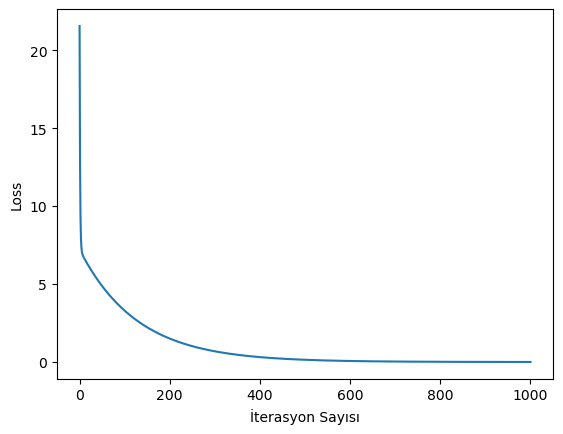

In [23]:
# loss değerinin azalıp azalmadığını gözlemleyelim
# loss_list'in içerisindeki loss değerlerini görselleştirelim
plt.plot(range(iteration_number), loss_list)
plt.xlabel("İterasyon Sayısı")
plt.ylabel("Loss")
plt.show()

loss'un giderek azaldığı görülür.

In [ ]:
# verilere uygun optimum regresyon çizgisini elde ettim.
# elde ettiğimiz parametreleri kullanarak tahminler (prediction) gerçekleştirilecek

## Linear Regression Modeli Testi (Testing)

In [ ]:
# oluşturulan modele araç fiyatları input olarak verilir ve tahmini değerler elde edilir
# gerçek değere ve tahmin edilen değerlere bakacağız

In [24]:
# car_price_tensor araba fiyatlarına göre tahmin yapıldı.
predicted = model(car_price_tensor).data.numpy() # numpy'a çevrildi

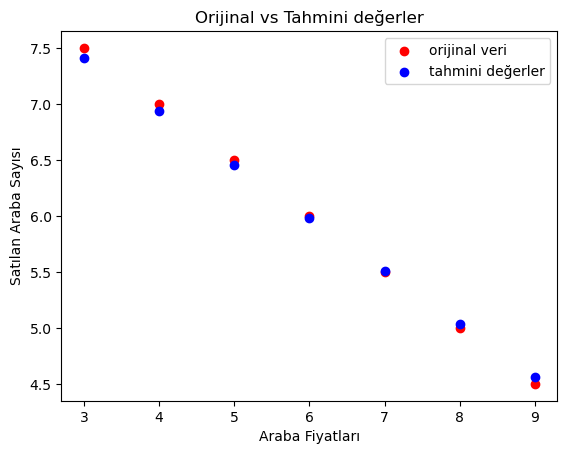

In [25]:
# orijinal değerler
plt.scatter(car_prices_array, number_of_car_sell_array, label = "orijinal veri", color = "red")
# tahmini değerler
plt.scatter(car_prices_array, predicted, label = "tahmini değerler", color="blue")

plt.legend()
plt.xlabel("Araba Fiyatları")
plt.ylabel("Satılan Araba Sayısı")
plt.title("Orijinal vs Tahmini değerler")
plt.show()